# Машинное обучение, ФКН ВШЭ

# Практическое задание 10. Обучение без учителя.

## Общая информация
Дата выдачи: 23.03.2022

Мягкий дедлайн: 06.04.2022 23:59 MSK

Жёсткий дедлайн: 10.04.2022 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-10-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании мы посмотрим на несколько алгоритмов кластеризации и применим их к географическим и текстовым данным. Также мы подробно остановимся на тематическом моделировании текстов, задаче обучения представлений и в каком-то смысле поработаем с semi-supervised learning. 



In [1]:
import pandas as pd
import numpy as np

np.random.seed(0xFFFFFFF)

**Задание 0 (1e-100 балла)**. Опишите свои ощущения от домашки по ЕМ-алгоритму (можно картинкой или мемом).

![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png](attachment:%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png)

## Часть 1. Кластеризация автобусных остановок

В этом задании мы сравним разные алгоритмы кластеризации для данных об автобусных остановках Москвы.

**Задание 1.1 (1 балл).** Реализуйте алгоритм спектральной кластеризации, который упоминался на лекции. Для этого разберитесь с кодом шаблона, данного ниже, и допишите недостающую функцию. Напомним, что для графа с матрицей смежности $W = \{w_{ij}\}_{i, j = 1 \dots \ell}$ лапласиан определяется как:

$$
L = D - W,
$$

где $D = \text{diag}(d_1, ..., d_{\ell}), d_i = \sum_{j=1}^{\ell} w_{ij}$.

In [3]:
from sklearn.base import ClusterMixin
from sklearn.cluster import KMeans

class GraphClustering(ClusterMixin):
    def __init__(self, n_clusters=8, n_components=None, **kwargs):
        '''
        Spectral clustering algorithm
        param n_clusters: number of clusters to form
        param n_components: number of eigenvectors to use
        '''

        if n_components is None:
            n_components = n_clusters

        self.n_components = n_components
        self.kmeans = KMeans(n_clusters=n_clusters, **kwargs)

    def fit_predict(self, X, y=None):
        '''
        Perform spectral clustering from graph adjacency matrix
        and return vertex labels.
        param X: (n_samples, n_samples) - graph adjacency matrix
        return: (n_samples, ) - vertex labels
        '''

        eigenvectors = self._generate_eigenvectors(X)
        labels = self.kmeans.fit_predict(eigenvectors[:, 1:])
        
        return labels

    def _generate_eigenvectors(self, X):
        '''
        Compute eigenvectors for spectral clustering
        param X: (n_samples, n_samples) - graph adjacency matrix
        return: (n_samples, n_components) - eigenvectors
        '''
        D = np.diag(X.sum(0))
        eig_val, eig_vec = np.linalg.eig(D - X)
        sorted_eig_vec = eig_vec.T[np.argsort(eig_val)].T
        
        return np.real(sorted_eig_vec)[:, :self.n_components]
        
        raise NotImplementedError

In [ ]:
import time

In [ ]:
X = np.arange(10000).reshape(-1, 10)
X.shape

(1000, 10)

In [ ]:
%%time
sigma_sq = 1000
n = X.shape[0]
WW = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        WW[i, j] = np.exp(- ((X[i] - X[j]) ** 2) / (2 * sigma_sq)).sum()
WW.shape

CPU times: user 11.6 s, sys: 631 ms, total: 12.2 s
Wall time: 14.8 s


In [ ]:
%%time
sigma_sq = 1000
n = X.shape[0]
W = np.empty((n, n))

for i in range(n):
    # X_i = np.tile(X[i], (n, 1))
    W[i] = (np.exp(- ((X[i] - X) ** 2) / (2 * sigma_sq))).sum(1)
W.shape

CPU times: user 244 ms, sys: 1.58 ms, total: 245 ms
Wall time: 247 ms


In [ ]:
D = np.diag(W.sum(0))
L = D - W
eig_val, eig_vec = np.linalg.eig(L)

In [ ]:
np.argsort(np.array([1. +05.j] * 5))

array([0, 1, 2, 3, 4])

Перед тем, как переходить к следующему заданию, протестируйте свое решение.

In [6]:
n_blocks, n_vertices = 10, 1000
block_vertices = n_vertices // n_blocks

X = np.zeros((n_vertices, n_vertices))
for i in range(0, n_vertices, block_vertices):
    X[i:i + block_vertices, i:i + block_vertices] = np.sqrt(i + 1)

graph_clustering = GraphClustering(n_clusters=n_blocks)
labels = graph_clustering.fit_predict(X)

true_labels = np.zeros(n_vertices, dtype=np.int32)
for i in range(0, n_vertices, block_vertices):
    true_labels[i:i + block_vertices] = labels[i]

assert labels.shape == (n_vertices, )
assert np.all(np.bincount(labels) == np.full(n_blocks, block_vertices))
assert np.all(labels == true_labels)

Теперь можем приступить к работе с реальными данными. Скачайте файл с данными об остановках общественного транспорта **в формате .xlsx** по [ссылке](https://data.mos.ru/opendata/download/60464/1/201) (так гарантированно не возникнет проблем с парсингом файла) и загрузите таблицу в ноутбук. Если вдруг сайт Правительства Москвы сойдет с ума, то возьмите какую-нибудь версию данных [отсюда](https://data.mos.ru/opendata/7704786030-city-surface-public-transport-stops). Для удобства визуализации мы будем работать только с остановками в ЦАО.

In [ ]:
!pip install openpyxl

In [4]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [176]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/iad_hw/homework-practice-10-unsupervised/transport.xlsx')
data = data[data.AdmArea_en == "Czentral`ny'j administrativny'j okrug"]
data = data.reset_index()
data.head()

index  ID_en                                            Name_en  \
0    278    347       «2-й Лесной пер.», улица Бутырский Вал (347)   
1    279    349    «Ул. Сущевский Вал», Новослободская улица (349)   
2    355    479  «Стадион Лужники (южн.) (пос.)», улица Лужники...   
3    356    480      «Спортзал Дружба», Лужнецкая набережная (480)   
4    357    481       «Лужнецкая наб.», Лужнецкая набережная (481)   

   Longitude_WGS84_en  Latitude_WGS84_en             Street_en  \
0           37.586584          55.782106   улица Бутырский Вал   
1           37.590714          55.790630  Новослободская улица   
2           37.565972          55.714265         улица Лужники   
3           37.570191          55.712504  Лужнецкая набережная   
4           37.574559          55.713770  Лужнецкая набережная   

                              AdmArea_en      District_en  \
0  Czentral`ny'j administrativny'j okrug   Tverskoj rajon   
1  Czentral`ny'j administrativny'j okrug   Tverskoj rajon   
2  Czentral`ny'j administrativny'j okrug  rajon Xamovniki   
3  Czentral`ny'j administrativny'j okrug  rajon Xamovniki   
4  Czentral`ny'j administrativny'j okrug  rajon Xamovniki   

                          RouteNumbers_en                 StationName_en  \
0                   АТ18; А12; АТ56; АТ78                2-й Лесной пер.   
1             АТ47; АМ10; АТ3; АТ56; АТ78              Ул. Сущевский Вал   
2  А64; А216; А809; АС12; А255; АБК; АТ79  Стадион Лужники (южн.) (пос.)   
3  А64; А216; А809; АС12; А255; АБК; АТ79                Спортзал Дружба   
4  А64; А216; А809; АС12; А255; АБК; АТ79                 Лужнецкая наб.   

   Direction_en Pavilion_en OperatingOrgName_en EntryState_en  global_id  \
0           NaN          да   ГУП «Мосгортранс»        active  889085436   
1           NaN          да   ГУП «Мосгортранс»        active  889085437   
2           NaN          да   ГУП «Мосгортранс»        active  889085549   
3           NaN          да   ГУП «Мосгортранс»        active  889085550   
4           NaN          да   ГУП «Мосгортранс»        active  889085551   

   geoData  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

Воспользуемся библиотекой `folium` для визуализации данных.

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install folium

In [7]:
import folium

map = folium.Map([55.75215, 37.61819], zoom_start=12)
for id, row in data.iterrows():
    folium.Circle([row.Latitude_WGS84_en, row.Longitude_WGS84_en],
                  radius=10).add_to(map)
map

**Задание 1.2 (1 балл).** Попробуем построить граф, в котором вершинами будут остановки. Как вы уже могли заметить, для каждой остановки указаны номера маршрутов, проходящих через неё. Логично соединить ребрами соседние остановки каждого маршрута. Однако мы не знаем, в каком порядке автобусы объезжают остановки. Но мы можем применить эвристический алгоритм, который восстановит нам порядок маршрутов:

* Для каждого маршрута выделим список всех остановок, через которые он проходит.
* Выберем начальную остановку маршрута как точку, наиболее удаленную от всех остальных остановок этого маршрута.
* Каждую следующую точку маршрута будем выбирать как самую близкую из оставшихся точек (не включенных в маршрут ранее).

Фактически, у нас получается жадное решение задачи коммивояжера. Когда мы отсортировали маршруты, можем построить по ним граф. Будем строить его по таким правилам:

* Между двумя остановками будет ребро, если они являются соседними хотя бы на одном маршруте. Вес ребра равен числу маршрутов, на которых остановки являются соседними.
* В графе не будет петель (то есть у матрицы смежности будет нулевая диагональ).

Реализуйте предложенный способ построения графа. Для этого рекомендуется воспользоваться шаблонами, приведенными ниже.

In [ ]:
routes_list = list(set(data["RouteNumbers_en"].str.split("; ").sum()))
routes_list

dct = dict.fromkeys(routes_list, [])

for i in range(len(data)):
    route_list = data["RouteNumbers_en"][i].split("; ")
    for route in route_list:
        dct[route] = dct[route] + [data["ID_en"][i]]
dct['А850']

[491,
 503,
 799,
 1058,
 1059,
 1068,
 1069,
 8012,
 8015,
 8016,
 1786,
 1787,
 8013,
 10476,
 10477]

In [ ]:
dct = {}
for i in range(len(data)):
    route_list = data["RouteNumbers_en"][i].split("; ")
    for route in route_list:
        dct[route] = dct.get(route, []) + [data["ID_en"][i]]
dct['А850']

[491,
 503,
 799,
 1058,
 1059,
 1068,
 1069,
 8012,
 8015,
 8016,
 1786,
 1787,
 8013,
 10476,
 10477]

In [146]:
stops = data[data["ID_en"].isin(dct['А850'])]
X = np.array(stops[["Latitude_WGS84_en", "Longitude_WGS84_en"]])

In [ ]:
n = X.shape[0]
W = np.empty((n, n))

for i in range(n):
    W[i] = ((X[i] - X) ** 2).sum(1)
W.mean(1)

array([0.00021125, 0.00020497, 0.00015551, 0.0003516 , 0.00015729,
       0.00015099, 0.00035424, 0.00023734, 0.00023632, 0.00015452,
       0.00038243, 0.00036816, 0.00037843, 0.00054491, 0.00054   ])

In [ ]:
np.argmin(W[np.nonzero(W)])

47

In [ ]:
nonzero_W = W[np.nonzero(W)]
np.where(W == np.min(nonzero_W))

(array([3, 6]), array([6, 3]))

In [ ]:
np.argmin(W, axis=0)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
# stops_id[np.argmin(W, axis=1)]

In [ ]:
# W.mean(1) - mean distance to other stops
stops_id = dct['А850']
# самая дальняя остановка на нулевом месте
nearest_idx = np.argmax(W.mean(1))
sorted_stops = [stops_id[nearest_idx]]

for _ in range(n - 1):
    W[:, nearest_idx] = 0  # зануляем пройденные остановки
    
    nonzero_W = W[nearest_idx][np.nonzero(W[nearest_idx])]
    nearest_idx = np.where(W[nearest_idx] == np.min(nonzero_W))[0][0]
    
    sorted_stops.append(stops_id[nearest_idx])
sorted_stops

[10476,
 10477,
 8013,
 8012,
 8015,
 799,
 8016,
 1068,
 1059,
 503,
 491,
 1058,
 1069,
 1786,
 1787]

In [70]:
def get_routes(data):
    '''
    Accumulate routes from raw data
    param data: pd.DataFrame - public transport stops data
    return: dict - unsorted stops ids for each route,
                   e.g. routes['A1'] = [356, 641, 190]
    '''
    dct = {}
    for i in range(len(data)):
        route_list = data["RouteNumbers_en"][i].split("; ")
        for route in route_list:
            dct[route] = dct.get(route, []) + [i]
            
    return dct
    raise NotImplementedError


def sort_routes(data, routes):
    '''
    Sort routes according to the proposed algorithm
    param data: pd.DataFrame - public transport stops data
    param routes: dict - unsorted stops ids for each route
    return: dict - sorted stops ids for each route
    '''
    dct = routes.copy()
    for route in dct.keys():
        stops_id = dct[route]
        stops_data = data.loc[stops_id]
        X = np.array(stops_data[["Latitude_WGS84_en", "Longitude_WGS84_en"]])
        n = X.shape[0]
        
        # Create adjacency matrix of stops' distances
        W = np.zeros((n, n))
        for i in range(n):
            W[i] = ((X[i] - X) ** 2).sum(1)
            
        # W.mean(1) - mean distance to the other stops
        nearest_idx = np.argmax(W.mean(1))
        # самая дальняя остановка на нулевом месте
        sorted_stops = [stops_id[nearest_idx]]
        
        for _ in range(n - 1):
            W[:, nearest_idx] = 0  # зануляем пройденные остановки
            nonzero_W = W[nearest_idx][np.nonzero(W[nearest_idx])]
            nearest_idx = np.where(W[nearest_idx] == np.min(nonzero_W))[0][0]
            
            sorted_stops.append(stops_id[nearest_idx])
        dct[route] = sorted_stops
        
    return dct
    raise NotImplementedError

    
def get_adjacency_matrix(data, sorted_routes):
    '''
    Compute adjacency matrix for sorted routes
    param data: pd.DataFrame - public transport stops data
    param sorted_routes: dict - sorted stops ids for each route
    return: (n_samples, n_samples) - graph adjacency matrix
    '''
    n = len(data)
    W = np.zeros((n, n))
    for route in sorted_routes.keys():
        stops_id = sorted_routes[route]
        for (i, j) in list(zip(stops_id[:-1], stops_id[1:])):
            W[i, j] += 1
            W[j, i] += 1

    return W
    raise NotImplementedError

In [71]:
routes = get_routes(data)
sorted_routes = sort_routes(data, routes)
adjacency_matrix = get_adjacency_matrix(data, sorted_routes)

In [73]:
np.diagonal(adjacency_matrix).sum()

0.0

Проверим, что маршруты получились адекватными. Для этого нарисуем их на карте.

In [ ]:
map = folium.Map([55.75215, 37.61819], zoom_start=12)
for route_id in np.random.choice(list(sorted_routes.keys()), size=50):
    coords = data.loc[
        sorted_routes[route_id],
        ['Latitude_WGS84_en', 'Longitude_WGS84_en']
    ].values.tolist()
    folium.vector_layers.PolyLine(coords).add_to(map)

map

**Задание 1.3 (0 баллов)**. Реализуйте функцию `draw_clustered_map`, которая рисует карту центра Москвы с кластерами остановок, раскрашенными в разные цвета.

In [200]:
import matplotlib.cm as cm
import matplotlib.colors as colors
def draw_clustered_map(data, labels):
    '''
    Create map with coloured clusters
    param data: pd.DataFrame - public transport stops data
    param labels: (n_samples, ) - cluster labels for each stop
    return: folium.Map - map with coloured clusters
    '''
    map = folium.Map([55.75215, 37.61819], zoom_start=12)
    for label in set(labels):
        coords = data[labels == label].values.tolist()
        x = np.arange(len(set(labels)))
        ys = [i + x + (i*x)**2 for i in range(len(set(labels)))]
        colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
        rainbow = [colors.rgb2hex(i) for i in colors_array]
        for point in coords:
            folium.CircleMarker(point, radius=1, color=rainbow[label]).add_to(map)
    return map
    raise NotImplementedError

**Задание 1.4 (1.5 балла)**. Примените алгоритмы кластеризации K-Means и DBSCAN из `sklearn` на координатах остановок, а также свою реализацию спектральной кластеризации на построенной выше матрице смежности. Визуализируйте результат кластеризации с помощью функции `draw_clustered_map`. Подберите параметры алгоритмов (`n_clusters` у K-Means, `eps` у DBSCAN, `n_clusters` и `n_components` у спектральной кластеризации) так, чтобы получить наиболее характерный для этих алгоритмов результат кластеризации (можете поэкспериментировать и оставить в ноутбуке картинки только для итоговых значений параметров, также обратите внимание на баланс объектов в кластерах). Не забудьте, что DBSCAN помечает некоторые точки как шумовые (можно раскрасить их в отдельный цвет).

In [177]:
X = data[['Latitude_WGS84_en', 'Longitude_WGS84_en']]

In [178]:
from sklearn.cluster import DBSCAN, KMeans, SpectralClustering

kmeans = KMeans(n_clusters=8)
km_pred = kmeans.fit_predict(X)
draw_clustered_map(X, km_pred)

In [99]:
dbscan = DBSCAN(eps=0.0037)
db_pred = dbscan.fit_predict(X)
draw_clustered_map(X, db_pred)

In [97]:
spec_clust = GraphClustering(n_clusters=20, n_components=50)
spec_pred = spec_clust.fit_predict(adjacency_matrix)
draw_clustered_map(X, spec_pred)

Проинтерпретируйте полученные результаты. Чем отличаются разбиения на кластеры, получаемые разными алгоритмами? Какие плюсы и минусы есть у каждого алгоритма? Какой алгоритм кажется вам наиболее подходящим для кластеризации остановок?

**Ответ:** Алгоритм K-means бездумно берет заданное количество кластеров и распределяет точки по центрам масс, притом он не учитывает маршруты движения. Зато K-means хорошо разделяет маршруты по районам, так как московские районы довольно выпуклы. Можно заметить, что в каждом районе свой класс, поэтому если правильно подобрать количество кластеров, то кластеризация выйдет неплохой.

Алгоритм DBSCAN сравнивает расстояния между остановками с порогом, чтобы кластеризовать тот или иной объект. У данного подхода есть существенный минус, так как расстояния между остановками на одном и том же маршруте могут сильно различаться и если в ццентральном районе они располагаются довольно кучно, то если применить этот метод в районе Крылатское, то кластеризация наверняка выделит несколько маленьких кластеров, хотя область может быть сильно связной маршрутами. Более того, DBSCAN сильно чувствителен к подбору порога.

Алгоритм Спектральной кластеризации, в отличие от предыдущих двух строит граф из маршрутов, после чего уже применяет K-means на собственных векторах Лапласиана матрицы смежности. Такой подход позволяет учитывать отдельные маршруты так, что на карте можно даже отследить пути движения (например в районе Хамовники). Однако теоретически такая модель построена только на гипотезе, а также она сильно зависит от параметров количества кластеров и компонент.

В целом, самым адекватным кажется алгоритм спектральной кластеризации, а также K-means, но только в предположении, что внутри районов имеется хорошая связность маршрутов.

## Часть 2. Тематическое моделирование текстов

В этой части мы познакомимся с одной из самых популярных задач обучения без учителя &mdash; с задачей тематического моделирования текстов. Допустим, нам доступна некоторая коллекция документов без разметки, и мы хотим автоматически выделить несколько тем, которые встречаются в документах, а также присвоить каждому документу одну (или несколько) тем. Фактически, мы будем решать задачу, похожую на кластеризацию текстов: отличие в том, что нас будет интересовать не только разбиение текстов на группы, но и выделение ключевых слов, определяющих каждую тему.

Мы будем работать с новостными статьями BBC за 2004-2005 годы. Скачайте данные по [ссылке](https://www.kaggle.com/hgultekin/bbcnewsarchive).

In [179]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iad_hw/homework-practice-10-unsupervised/bbc-news-data.csv', sep='\t')
data.sample(5)

category filename                              title  \
1040  politics  145.txt    Candidate resigns over BNP link   
1315     sport  003.txt  Greene sets sights on world title   
316   business  317.txt  Christmas shoppers flock to tills   
1878      tech  055.txt    Junk e-mails on relentless rise   
1249  politics  354.txt    Brown names 16 March for Budget   

                                                content  
1040   A prospective candidate for the UK Independen...  
1315   Maurice Greene aims to wipe out the pain of l...  
316    Shops all over the UK reported strong sales o...  
1878   Spam traffic is up by 40%, putting the total ...  
1249   Chancellor Gordon Brown will deliver his Budg...

Как вы могли заметить, данные уже содержат разметку по тематике (колонка category). В этой части мы забудем, что она есть, и будем работать только с текстовыми данными. Проведем предобработку текста, состоящую из следующих пунктов:

* Объединим заголовок и содержание статьи в одно поле.
* Приведем текст к нижнему регистру, разобьем его на токены.
* Оставим только буквенные слова (удалив, таким образом, пунктуацию и числа).
* Применим лемматизацию.
* Удалим стоп-слова.


In [ ]:
!pip install nltk

In [101]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [102]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words('english') + ['ha', 'wa', 'say', 'said'])
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [103]:
def preprocess(text):
    text = list(filter(str.isalpha, word_tokenize(text.lower())))
    text = list(lemmatizer.lemmatize(word) for word in text)
    text = list(word for word in text if word not in stop_words)
    return ' '.join(text)

In [104]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [181]:
data['raw_text'] = data.apply(lambda row: row.title + row.content, axis=1)
data['text'] = data.apply(lambda row: preprocess(row.raw_text), axis=1)

Для визуализации частот слов в текстах мы будем использовать [облака тегов](https://en.wikipedia.org/wiki/Tag_cloud).

In [ ]:
!pip install worldcloud

ERROR: Could not find a version that satisfies the requirement worldcloud (from versions: none)
ERROR: No matching distribution found for worldcloud


In [106]:
from wordcloud import WordCloud

def draw_wordcloud(texts, max_words=1000, width=1000, height=500):
    wordcloud = WordCloud(background_color='white', max_words=max_words,
                          width=width, height=height)
    
    joint_texts = ' '.join(list(texts))
    wordcloud.generate(joint_texts)
    return wordcloud.to_image()

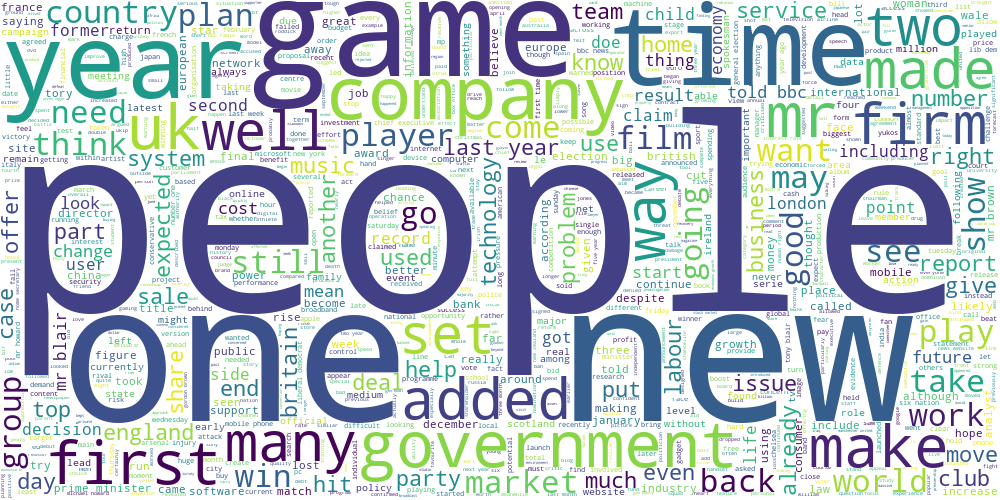

In [107]:
draw_wordcloud(data.text)

**Задание 2.1 (1 балл).** Обучите алгоритм K-Means на tf-idf представлениях текстов. При обучении tf-idf векторайзера рекомендуется отбрасывать редко встречающиеся слова, а также воздержитесь от использования N-грамм. Возьмите не очень большое число кластеров, чтобы было удобно интерпретировать получившиеся темы (например, `n_clusters` = 8). Постройте облака тегов для текстов из разных кластеров. Получились ли темы интерпретируемыми? Попробуйте озаглавить каждую тему.

**Ответ:** ДА! Почти все темы получились интерпретируемыми и это круто.

In [182]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data.text)

In [120]:
kmeans_vecs = KMeans(n_clusters=8)
kmeans_vecs_preds = kmeans_vecs.fit_predict(X)

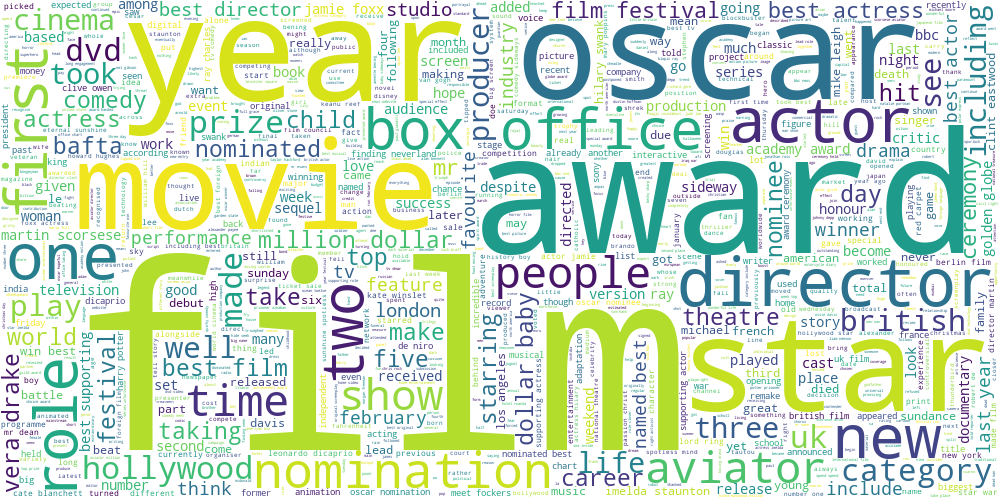

In [124]:
# Очевидна тема КИНОИНДУСТРИИ
draw_wordcloud(data.text[kmeans_vecs_preds == 0])

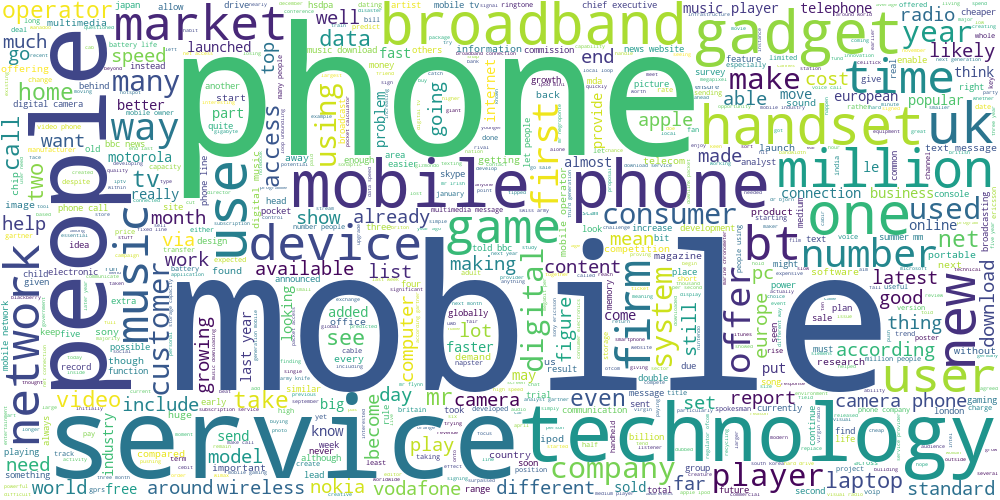

In [125]:
# Тема ТЕХНОЛОГИИ И ГАДЖЕТЫ
draw_wordcloud(data.text[kmeans_vecs_preds == 1])

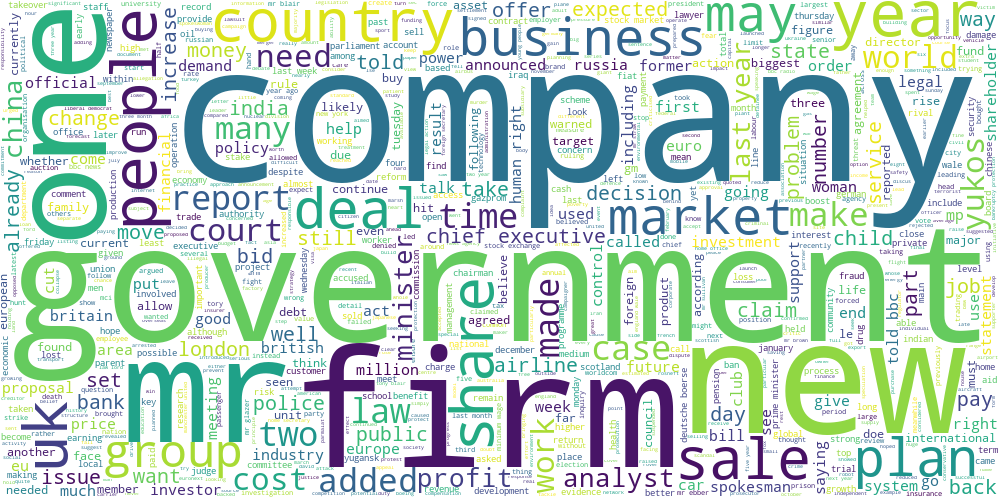

In [127]:
# Что-то связанное с макроэкономическими субъектами и институтами
# Cкорее всего тема МАКРОЭКОНОМИКА
draw_wordcloud(data.text[kmeans_vecs_preds == 7])

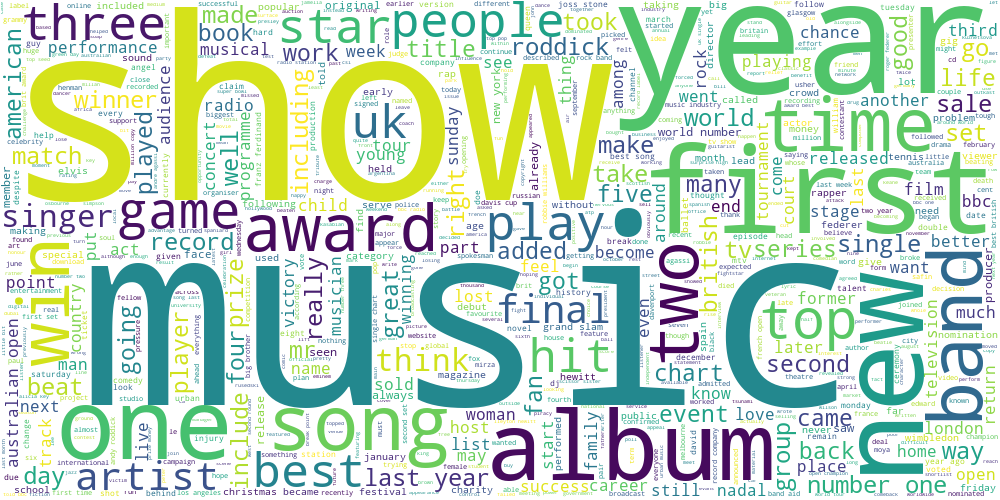

In [131]:
# Тема МУЗЫКАЛЬНАЯ ИНДУСТРИЯ
draw_wordcloud(data.text[kmeans_vecs_preds == 5])

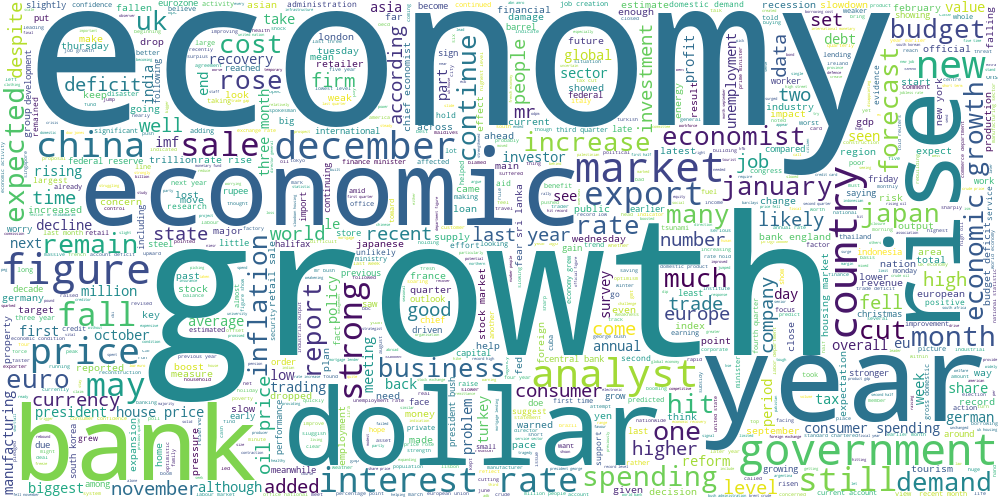

In [132]:
# Какая-то экономическая тема, скорее ФИНАНСОВАЯ ЭКОНОМИКА
draw_wordcloud(data.text[kmeans_vecs_preds == 6])

**Задание 2.2 (0.5 балла).** Попробуем другой способ выделить ключевые слова для каждой темы. Помимо непосредственного разбиения объектов алгоритм K-Means получает центр каждого кластера. Попробуйте взять центры кластеров и посмотреть на слова, для которых значения соответствующих им признаков максимальны. Согласуются ли полученные слова с облаками тегов из прошлого задания?

**Ответ:** Да, вполне согласуются.

In [138]:
center_vecs = kmeans_vecs.cluster_centers_

In [167]:
np.argmin((np.array(X - center_vecs[0]) ** 2).sum(1))

600

In [169]:
for i in range(center_vecs.shape[0]):
    closest_idx = np.argmin((np.array(X - center_vecs[i]) ** 2).sum(1))
    print(f"Cluster {i}: {data.text[closest_idx]}")

Cluster 0: wine comedy win critic award quirky comedy sideways named best film year los angeles film critic association u movie also picked four accolade including best director alexander payne supporting actor thomas haden church british actress imelda staunton recognised role vera drake winning best actress liam neeson best actor kinsey award handed january ceremony la vega sideways tell story two men take road trip california wine region also star paul giamatti virginia madsen also named best supporting actress performance film house flying dagger directed yimou zhang named best foreign language film animation award went incredibles unusually category also named clint eastwood million dollar baby missing best film award best director martin scorsese aviator career achievement award handed veteran actor comic jerry lewis ceremony next year
Cluster 1: fear lost mobile people becoming dependent mobile phone one three concerned losing phone would mean lose friend mobile owner reported p

**Задание 2.3 (1.5 балла).** В первой части мы сравнили три разных алгоритма кластеризации на географических данных. Проделаем то же самое для текстовых данных (в качестве признакого описания снова используем tf-idf). Получите три разбиения на кластеры с помощью алгоритмов K-Means, DBSCAN и спектральной кластеризации (на этот раз воспользуйтесь реализацией из `sklearn`). Для K-Means и спектральной кластеризации возьмите одинаковое небольшое число кластеров, подберите параметр `eps` метода DBSCAN так, чтобы получить приблизительно такое же число кластеров.

Далее, обучите двухмерные t-SNE представления над tf-idf признаками текстов. Визуализируйте эти представления для каждого алгоритма, раскрасив каждый кластер своим цветом. Лучше всего расположить визуализации на одном графике на трех разных сабплотах. Не забудьте, что DBSCAN помечает некоторые точки как шумовые (можно раскрасить их в отдельный цвет).

In [183]:
X.shape

(2225, 24204)

In [231]:
kmeans = KMeans(n_clusters=8)
km_pred = kmeans.fit_predict(X)

spec_clust = SpectralClustering(n_clusters=8)
spec_pred = spec_clust.fit_predict(X)

dbscan = DBSCAN(eps=0.9)
db_pred = dbscan.fit_predict(X)

In [197]:
from sklearn.manifold import TSNE
tsne = TSNE()
vecs2d_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


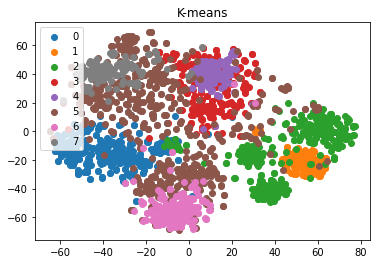

In [228]:
import matplotlib.pyplot as plt
for i in set(km_pred):
    plt.scatter(vecs2d_tsne[km_pred == i][:, 0], vecs2d_tsne[km_pred == i][:, 1] , label = i)
plt.title("K-means")
plt.legend()
plt.show()

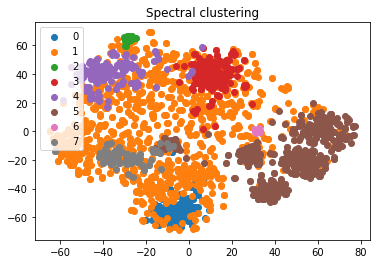

In [227]:
for i in set(spec_pred):
    plt.scatter(vecs2d_tsne[spec_pred == i][:, 0], vecs2d_tsne[spec_pred == i][:, 1] , label = i)
plt.title("Spectral clustering")
plt.legend()
plt.show()

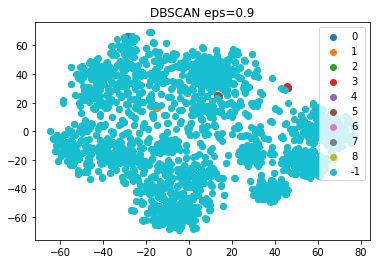

In [232]:
for i in set(db_pred):
    plt.scatter(vecs2d_tsne[db_pred == i][:, 0], vecs2d_tsne[db_pred == i][:, 1] , label = i)
plt.title("DBSCAN eps=0.9")
plt.legend()
plt.show()

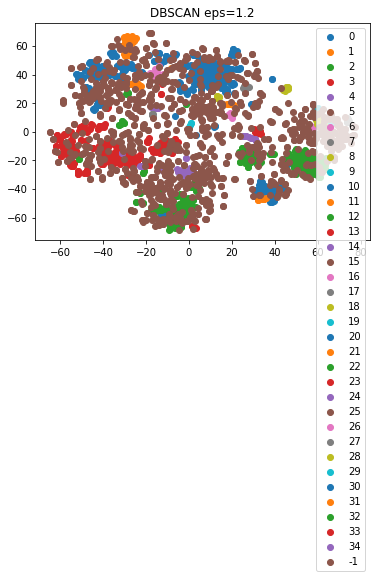

In [230]:
dbscan = DBSCAN(eps=1.2)
db_pred = dbscan.fit_predict(X)

for i in set(db_pred):
    plt.scatter(vecs2d_tsne[db_pred == i][:, 0], vecs2d_tsne[db_pred == i][:, 1] , label = i)
plt.title("DBSCAN eps=1.2")
plt.legend()
plt.show()

Прокомментируйте получившиеся результаты. Какой баланс кластеров получился у разных методов? Соотносятся ли визуализации для текстов с визуализациями для географических данных?

**Ответ:** Самые сбалансированные классы вышли у K-means, менее сбалансированные классы выдала Спектральная кластеризация, самые дисбалансные классы в методе DBSCAN. 

Да, есть некоторые сходства, например у метода K-means очевидно все кластеры будут одного размера, тогда как у DBSCAN кластеры более хаотичны и более разбалансированы, притом пришлось поменять порог `eps`, чтобы один класс не съедал все объекты. Спектральная кластеризация здесь очень похожа на K-means, также как и на географических данных.

**Задание 2.4 (1.5 балла).** Обучите модель латентного размещения Дирихле. Не забудьте, что она работает с мешком слов, а не с tf-idf признаками. Придумайте, как превратить распределение тем для текста в номер его кластера. Возьмите параметр `n_components` в 2-3 раза больше, чем число кластеров для K-Means. Получились ли темы более узкими от такого нововведения? Постройте облака тегов для нескольких наиболее удачных тем.

**Ответ:**

In [238]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(data.text)

In [250]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=20)
X_lda = lda.fit_transform(X)

In [275]:
lda_clusters = np.argmax(X_lda, axis=1)

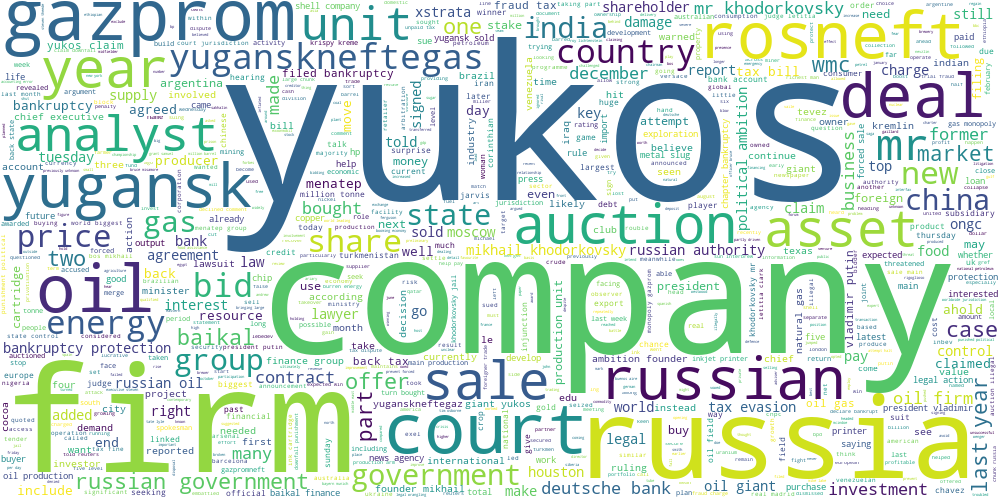

In [278]:
# Вышла хорошая подтема НЕФТЕГАЗОВАЯ ОТРАСЛЬ
draw_wordcloud(data.text[lda_clusters == 2])

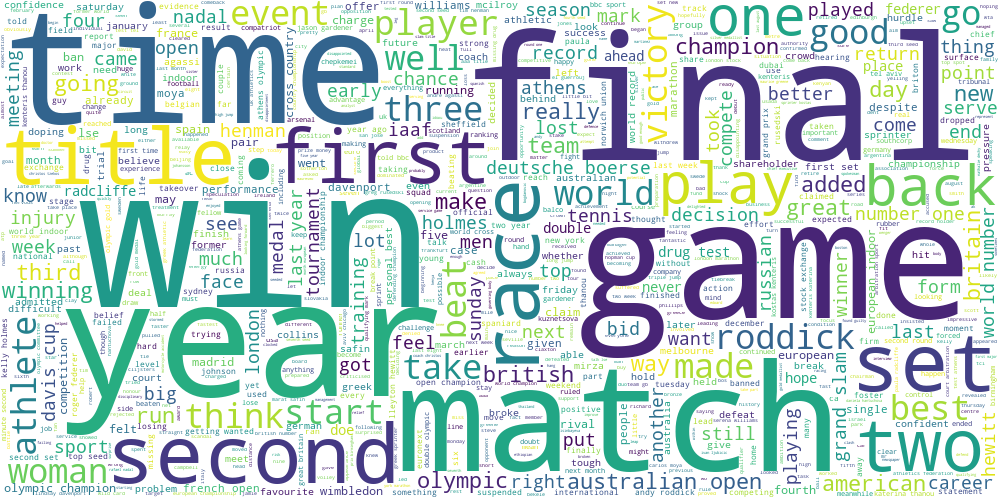

In [288]:
# Более узкая подтема СПОРТ, которой раньше не было
draw_wordcloud(data.text[lda_clusters == 12])

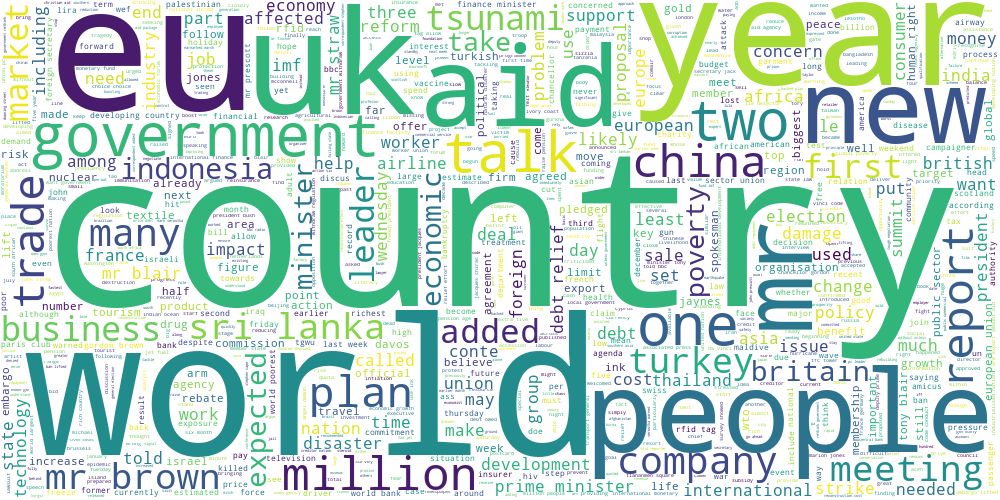

In [301]:
# Подтема макроэкономики МЕЖДУНАРОДНЫЕ ТОРГОВЛЯ 
draw_wordcloud(data.text[lda_clusters == 15])

## Часть 3. Transfer learning для задачи классификации текстов

**Задание 3.1 (0.5 балла).** Вспомним, что у нас есть разметка для тематик статей. Попробуем обучить классификатор поверх unsupervised-представлений для текстов. Рассмотрите три модели:

* Логистическая регрессия на tf-idf признаках
* K-Means на tf-idf признаках + логистическая регрессия на расстояниях до центров кластеров
* Латентное размещение Дирихле + логистическая регрессия на вероятностях тем

Разделите выборку на обучающую и тестовую, замерьте accuracy на обоих выборках для всех трех моделей. Параметры всех моделей возьмите равными значениям по умолчанию.

In [ ]:
# YOUR CODE HERE ‿︵‿︵ヽ(°□° )ノ︵‿︵‿

У какой модели получилось лучшее качество? С чем это связано?

**Ответ:**

**Задание 3.2 (1.5 балла).** Теперь просимулируем ситуацию слабой разметки, которая часто встречается в реальных данных. Разделим обучающую выборку в пропорции 5:65:30. Будем называть части, соответственно, размеченный трейн, неразмеченный трейн и валидация.

Все unsupervised-алгоритмы (векторайзеры и алгоритмы кластеризации) запускайте на всем трейне целиком (размеченном и неразмеченном, суммарно 70%), а итоговый классификатор обучайте только на размеченном трейне (5%). Подберите гиперпараметры моделей по качеству на валидации (30%), а затем оцените качество на тестовой выборке (которая осталась от прошлого задания). Не скромничайте при подборе числа кластеров, сейчас нас интересует не интерпретируемое разбиение выборки, а итоговое качество классификации. 

In [ ]:
# YOUR CODE HERE ‿︵‿︵ヽ(°□° )ノ︵‿︵‿

Как изменились результаты по сравнению с обучением на полной разметке? Сделайте выводы.

**Ответ:**

## Бонус

**Задание 4 (1 балл)**. Разберитесь с semi-supervised методами, которые реализованы в `sklearn` и примените их к заданию 3.2. Получилось ли добиться лучшего качества? Сделайте выводы.

In [ ]:
# YOUR CODE HERE ‿︵‿︵ヽ(°□° )ノ︵‿︵‿

**Задание 5 (1 балл)**. На занятиях мы обсуждали, что метрика [BCubed](https://www.researchgate.net/profile/Julio-Gonzalo-2/publication/225548032_Amigo_E_Gonzalo_J_Artiles_J_et_alA_comparison_of_extrinsic_clustering_evaluation_metrics_based_on_formal_constraints_Inform_Retriev_12461-486/links/0c96052138dbb99740000000/Amigo-E-Gonzalo-J-Artiles-J-et-alA-comparison-of-extrinsic-clustering-evaluation-metrics-based-on-formal-constraints-Inform-Retriev-12461-486.pdf) хорошо подходит для сравнения алгоритмов кластеризации, если нам известно настоящее разделение на кластеры (gold standard). Реализуйте подсчет метрики BCubed и сравните несколько алгоритмов кластеризации на текстовых данных из основного задания. В качестве gold standard используйте разметку category.

In [ ]:
# YOUR CODE HERE ‿︵‿︵ヽ(°□° )ノ︵‿︵‿

**Задание 6 (2 баллa)**. Спектральная кластеризация, по сути, является обычной кластеризацией KMeans поверх эмбеддингов объектов, которые получаются из лапласиана графа. А что, если мы попробуем построить эмбеддинги каким-нибудь другим способом? В этом задании мы предлагаем вам проявить немного фантазии. Возьмите какие-нибудь данные высокой размерности, чтобы задача обучения эмбеддингов имела смысл (например, картинки или тексты, желательно выбрать что-нибудь оригинальное). Придумайте или найдите какой-нибудь метод обучения эмбеддингов, примените его к данным и кластеризуйте полученные представления. Если чувствуете в себе достаточно силы, можете попробовать что-нибудь нейросетевое. Сравните ваш подход с базовыми алгоритмами кластеризации, которое мы рассмотрели в основном задании, не забывайте про визуализации! Ключевые слова для вдохновения: ***KernelPCA***, ***UMAP***, ***autoencoders***, ***gensim***. 

In [ ]:
# YOUR CODE HERE ‿︵‿︵ヽ(°□° )ノ︵‿︵‿

**Задание 7 (1 балл)**. В нынешние непростые времена как никогда важно уметь отвлекаться и находить себе развлечение. Мы поощряем не только предметное, но и духовное развитие. Поэтому, чтобы заработать балл за этот социализационный бонус, сходите на какую-нибудь выставку или в музей, напишите небольшой отчетик о ваших впечатлениях и добавьте фотопруфы в ноутбук при сдаче. Можете объединиться с одногруппниками/однокурсниками, а также пригласить ассистентов/преподавателей, они тоже будут рады выбраться куда-нибудь. Для вдохновения приведем ссылку на актуальные выставки [новой](https://www.youtube.com/watch?v=dQw4w9WgXcQ&ab) и [старой Третьяковки](https://www.youtube.com/watch?v=xm3YgoEiEDc) (но совсем не обязательно посещать именно их).

In [ ]:
# YOUR CODE HERE (ノಠ益ಠ)ノ彡┻━┻